In [1]:
import pandas as pd
import numpy as np

## 데이터 전처리
- 연속형
1. age : 나이<br>
2. stat_overall : 선수의 현재 능력치 입니다.<br>
3. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.<br>
4. value(예측값) : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다<br>
- 이산/범주형
1. continent : 선수들의 국적이 포함되어 있는 대륙입니다<br>
2. contract_until(전처리 필요) : 선수의 계약기간이 언제까지인지 나타내어 줍니다<br>
3. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등<br>
4. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발<br>
5. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수<br>
6. stat_skill_moves : 선수의 개인기 능력치 입니다.<br>
- 정리에서 제외한 변수
1. id : 선수 고유의 아이디<br>
2. name : 이름<br>

In [2]:
train = pd.read_csv('FIFA_train.csv',encoding = 'utf-8') # train data
test = pd.read_csv("FIFA_test.csv",encoding = 'utf-8') # test data

In [3]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

<AxesSubplot:>

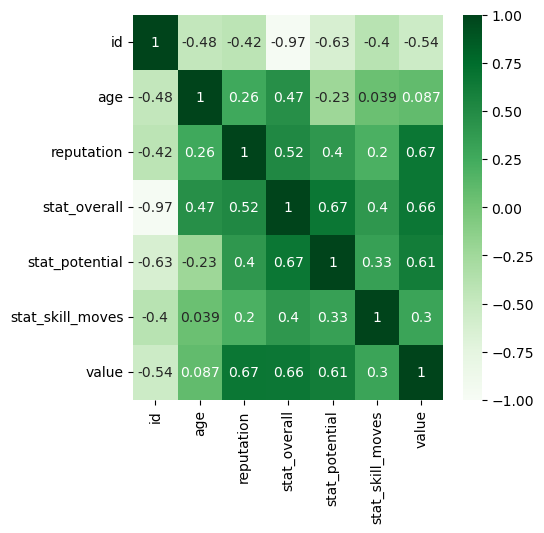

In [4]:
#heatmap으로 상관관계를 표시
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(train.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [5]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [6]:
# 연속형 자료 : ['age',	'stat_overall',	'stat_potential',	'value']
# 범주형/이산형 자료 : ['name',	'continent',	'contract_until',	'position',	'prefer_foot','reputation', 'stat_skill_moves', 'id' ]


nums = train[['age',	'stat_overall',	'stat_potential',	'value']]            # 연속형 자료 바인딩
noms = train[['continent','position',	'prefer_foot','reputation', 'stat_skill_moves']]   # 범주형/이산형 자료 바인딩, id, name 은 선수 고유명사 이므로 제외, 계약기간도 의미 없으므로 제외

In [7]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


### 파생변수

1. career_length:축구 선수의 나이와 계약 만료일은 선수의 경력 기간을 나타내는 중요한 변수입니다.<br> 선수의 경력 기간을 나타내는 파생 변수를 만들 수 있습니다.<br> 예를 들어, 다음과 같은 공식을 사용하여 경력 기간 파생 변수를 만들 수 있습니다.<br> career_length 변수의 해석은 경력의 실제 길이보다는 가상적인 경력 길이에 더 가깝게 된다는 점을 염두에 두어야 합니다.<br> 그러나 이 변수는 여전히 선수의 계약 만료 연도와 현재 나이 간의 차이를 측정하는 유용한 지표가 될 수 있습니다.<br> 또한, 다른 변수들과 함께 모델링에 활용되어 선수의 가치나 성과를 예측하는 데 사용될 수 있습니다.

In [8]:
# from datetime import datetime

# def extract_date_info(date_string):
#     if ',' in date_string:
#         date_obj = datetime.strptime(date_string, '%b %d, %Y')
#         year = date_obj.strftime('%Y')
#         month = date_obj.strftime('%m')
#         day = date_obj.strftime('%d')
#     else:
#         year = date_string
#         month = '01'
#         day = '01'
#     return int(year), int(month), int(day)

# train['contract_until_year'], train['contract_until_month'], train['contract_until_day'] = zip(*train['contract_until'].apply(lambda x: extract_date_info(str(x))))

# train['career_length'] = (train['contract_until_year'] - train['age']) * 12 + (train['contract_until_month'] - 1)

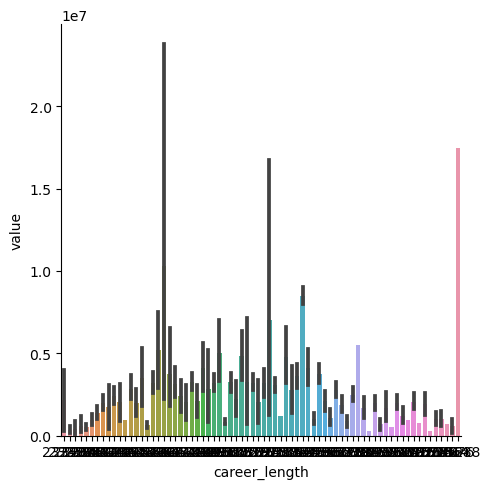

In [11]:
# Correlation between numerical and categorical variables
sns.catplot(x="career_length", y="value", data=train, kind="bar")

# Show plot
plt.show()

<AxesSubplot:>

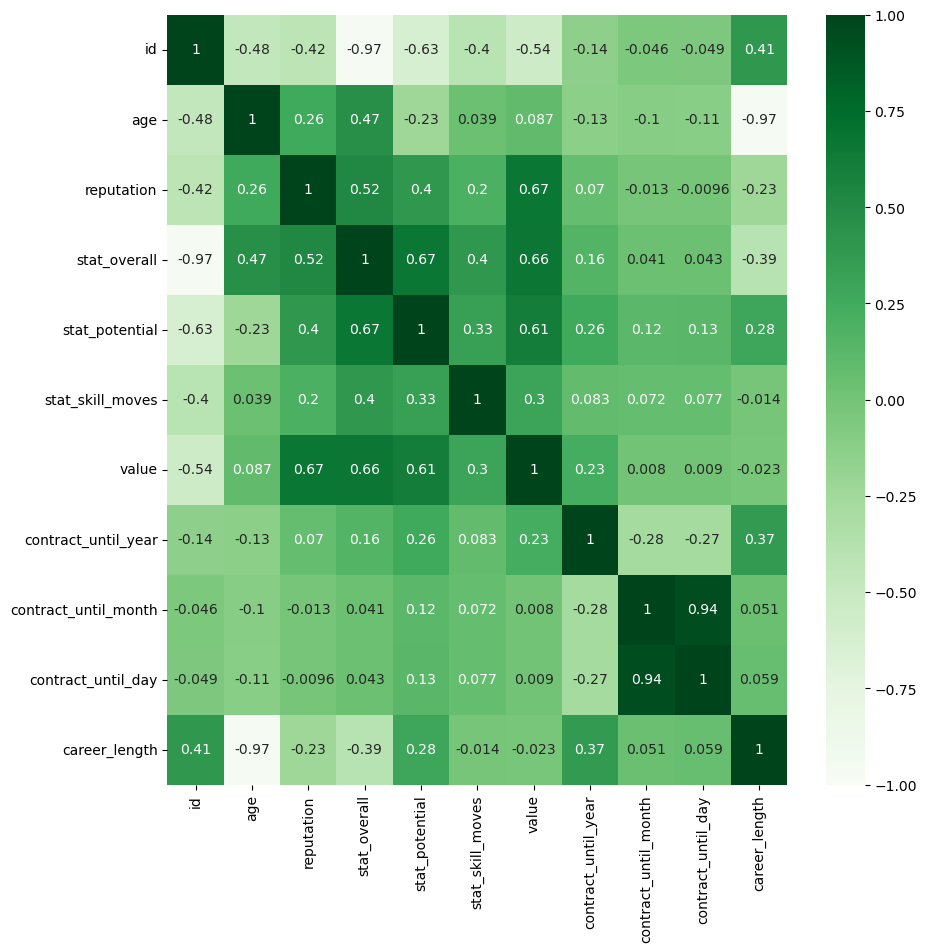

In [10]:
#heatmap으로 상관관계를 표시
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(train.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

2. 축구 선수의 포지션은 그들의 역할과 통계에 영향을 미칩니다.<br> 예를 들어, 공격수와 수비수는 서로 다른 통계를 갖고 있기 때문에, 축구 선수의 포지션에 따라 통계 파생 변수를 만들 수 있습니다.<br> 각 포지션의 통계의 평균값을 계산하여 파생 변수를 만들 수 있습니다.<br> 예를 들어, 다음 코드는 선수 포지션별로 stat_overall, stat_potential 및 value의 평균값을 계산하여 파생 변수를 생성합니다.

In [86]:
position_stat = train.groupby('position')[['stat_overall', 'stat_potential']].mean()
train = pd.merge(train, position_stat, on='position', how='left', suffixes=('', '_mean'))

KeyError: 'position'

In [12]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_until_year,contract_until_month,contract_until_day,career_length,stat_overall_mean,stat_potential_mean
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,2021,1,1,23880,67.300293,72.570088
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,2020,1,1,23916,65.188492,70.655754
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,2021,1,1,23880,67.300293,72.570088
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,2020,1,1,23856,67.304192,71.671444
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,2021,1,1,23952,65.188492,70.655754


In [14]:
train['stat_potential_dif']= train['stat_potential']-train['stat_potential_mean']

In [17]:
train['stat_overall_dif']= train['stat_overall']-train['stat_overall_mean']

In [23]:
train['stat_overall_dif^2']=train['stat_overall_dif'].pow(2)

In [34]:
train['stat_potential_dif^2']=train['stat_potential_dif'].pow(2)

In [25]:
train['sod*re']=train['stat_overall_dif^2']*train['reputation']

In [35]:
train['spd*re']=train['stat_potential_dif^2']*train['reputation']

In [36]:
train.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_until_year,contract_until_month,contract_until_day,...,stat_overall_mean,stat_potential_mean,stat_potential_dif,stat_overall_dif,stat_overall_dif^2,sod*re,log_sod,skill,stat_potential_dif^2,spd*re
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280,-0.143197,-0.046285,-0.049370,...,-1.003491e-01,-8.065067e-02,-6.252829e-01,-9.671902e-01,0.026302,-0.189508,-0.011948,-0.485751,-0.073565,-0.207937
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319,-0.132052,-0.103410,-0.112981,...,-4.633085e-02,-7.993380e-02,-2.244808e-01,4.742729e-01,-0.152083,0.037955,-0.131046,0.193024,-0.027499,0.047572
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982,0.070446,-0.012734,-0.009641,...,1.677029e-02,3.002685e-02,3.981686e-01,5.222987e-01,0.522044,0.765308,0.412647,0.807204,0.353125,0.643124
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444,0.156983,0.040686,0.043356,...,9.911661e-02,8.099999e-02,6.606772e-01,9.950758e-01,0.036169,0.309499,0.061176,0.555840,0.167382,0.341012
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907,0.258477,0.120045,0.129245,...,8.106273e-02,9.919339e-02,9.950682e-01,6.606721e-01,0.223907,0.350043,0.226503,0.440934,0.206025,0.344064
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500,0.082641,0.071906,0.077429,...,6.521844e-01,6.984912e-01,2.645975e-01,3.371819e-01,-0.028914,0.064691,-0.010633,0.683616,0.039278,0.083209
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000,0.228638,0.007977,0.009034,...,4.951298e-02,7.985873e-02,6.069791e-01,6.567708e-01,0.609613,0.791491,0.411038,0.642451,0.582179,0.803132
contract_until_year,-0.143197,-0.132052,0.070446,0.156983,0.258477,0.082641,0.228638,1.000000,-0.276855,-0.273679,...,2.671445e-02,3.122363e-02,2.566455e-01,1.550989e-01,0.136258,0.123307,0.114443,0.088893,0.177076,0.160848
contract_until_month,-0.046285,-0.103410,-0.012734,0.040686,0.120045,0.071906,0.007977,-0.276855,1.000000,0.938925,...,4.436539e-02,6.764369e-02,1.138967e-01,3.646872e-02,-0.065171,-0.041155,-0.044516,0.028955,-0.021474,-0.020091
contract_until_day,-0.049370,-0.112981,-0.009641,0.043356,0.129245,0.077429,0.009034,-0.273679,0.938925,1.000000,...,4.370085e-02,7.035989e-02,1.228719e-01,3.921774e-02,-0.067589,-0.042657,-0.039091,0.033262,-0.021392,-0.020727


3. 축구선수의 명성(reputation)과 기술 능력(stat_skill_moves)은 선수의 실력을 나타내는 중요한 변수입니다.<br> 이 두 변수를 결합하여 선수의 기술을 나타내는 파생 변수를 만들 수 있습니다.<br> 예를 들어, 다음 공식을 사용하여 기술 파생 변수를 만들 수 있습니다:

$$skill = reputation * stat\ skill\ moves$$

In [31]:
train['skill'] = train['reputation'] * train['stat_skill_moves']

In [32]:
train.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_until_year,contract_until_month,contract_until_day,career_length,stat_overall_mean,stat_potential_mean,stat_potential_dif,stat_overall_dif,stat_overall_dif^2,sod*re,log_sod,skill
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280,-0.143197,-0.046285,-0.049370,0.406194,-1.003491e-01,-8.065067e-02,-6.252829e-01,-9.671902e-01,0.026302,-0.189508,-0.011948,-0.485751
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319,-0.132052,-0.103410,-0.112981,-0.969121,-4.633085e-02,-7.993380e-02,-2.244808e-01,4.742729e-01,-0.152083,0.037955,-0.131046,0.193024
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982,0.070446,-0.012734,-0.009641,-0.228141,1.677029e-02,3.002685e-02,3.981686e-01,5.222987e-01,0.522044,0.765308,0.412647,0.807204
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444,0.156983,0.040686,0.043356,-0.394945,9.911661e-02,8.099999e-02,6.606772e-01,9.950758e-01,0.036169,0.309499,0.061176,0.555840
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907,0.258477,0.120045,0.129245,0.284661,8.106273e-02,9.919339e-02,9.950682e-01,6.606721e-01,0.223907,0.350043,0.226503,0.440934
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500,0.082641,0.071906,0.077429,-0.013865,6.521844e-01,6.984912e-01,2.645975e-01,3.371819e-01,-0.028914,0.064691,-0.010633,0.683616
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000,0.228638,0.007977,0.009034,-0.022967,4.951298e-02,7.985873e-02,6.069791e-01,6.567708e-01,0.609613,0.791491,0.411038,0.642451
contract_until_year,-0.143197,-0.132052,0.070446,0.156983,0.258477,0.082641,0.228638,1.000000,-0.276855,-0.273679,0.371277,2.671445e-02,3.122363e-02,2.566455e-01,1.550989e-01,0.136258,0.123307,0.114443,0.088893
contract_until_month,-0.046285,-0.103410,-0.012734,0.040686,0.120045,0.071906,0.007977,-0.276855,1.000000,0.938925,0.050708,4.436539e-02,6.764369e-02,1.138967e-01,3.646872e-02,-0.065171,-0.041155,-0.044516,0.028955
contract_until_day,-0.049370,-0.112981,-0.009641,0.043356,0.129245,0.077429,0.009034,-0.273679,0.938925,1.000000,0.058930,4.370085e-02,7.035989e-02,1.228719e-01,3.921774e-02,-0.067589,-0.042657,-0.039091,0.033262


4. 선수의 경력 단계를 나타내는 연령 그룹 변수를 만들 수 있습니다.<br> 예를 들어, 다음 기준에 따라 연령 그룹을 만들 수 있습니다: 20세 미만, 20-25세, 26-30세, 30세 이상.<br>아래 코드에서 bins는 각 그룹의 경계값을 나타내는 리스트이고,<br> labels는 각 그룹에 해당하는 이름을 나타내는 리스트입니다.<br> pd.cut 함수를 사용하여 age 변수를 bins로 구분하고, labels로 라벨링하여 age_group 변수에 저장합니다.<br> 아래 코드는 연령 그룹을 나타내는 파생 변수를 만드는 예시입니다:

In [37]:
train['age_group'] = pd.cut(train['age'], 
                            bins=[0, 20, 25, 30, 100], 
                            labels=['under 20', '20-25', '26-30', 'over 30'])

In [38]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,stat_potential_mean,stat_potential_dif,stat_overall_dif,stat_overall_dif^2,sod*re,log_sod,skill,stat_potential_dif^2,spd*re,age_group
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,...,72.570088,21.429912,26.699707,712.874340,3564.371701,8.178743,20.0,459.241129,2296.205647,over 30
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,70.655754,22.344246,25.811508,666.233942,2664.935768,7.887935,4.0,499.265331,1997.061323,26-30
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,72.570088,18.429912,23.699707,561.676100,2808.380499,7.940363,15.0,339.661657,1698.308286,over 30
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,71.671444,19.328556,23.695808,561.491315,2245.965258,7.716891,12.0,373.593080,1494.372319,over 30
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,70.655754,22.344246,24.811508,615.610926,1846.832778,7.521227,3.0,499.265331,1497.795992,20-25


In [72]:
age_group_level_map = {
    'under 20' :    0.4,
    '20-25'    :    0.3, 
    '26-30'       :    0.2,
    'over 30'        :    0.1, 
    } 
    
train['age_group_level'] = train['age_group'].map(age_group_level_map)

In [73]:
train['age_group_level']

/Users/lhe339/opt/anaconda3/envs/torch/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0       0.1
1       0.2
2       0.1
3       0.1
4       0.3
       ... 
8927    0.4
8928    0.4
8929    0.4
8930    0.4
8931    0.4
Name: age_group_level, Length: 8932, dtype: category
Categories (4, float64): [0.4 < 0.3 < 0.2 < 0.1]

In [74]:
train['age_group_level']=train['age_group_level'].astype('float64')

In [75]:
train['agl*spdre']=train['age_group_level']*train['spd*re']

In [76]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,stat_overall_dif,stat_overall_dif^2,sod*re,log_sod,skill,stat_potential_dif^2,spd*re,age_group,age_group_level,agl*spdre
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,...,26.699707,712.874340,3564.371701,8.178743,20.0,459.241129,2296.205647,over 30,0.1,229.620565
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,25.811508,666.233942,2664.935768,7.887935,4.0,499.265331,1997.061323,26-30,0.2,399.412265
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,23.699707,561.676100,2808.380499,7.940363,15.0,339.661657,1698.308286,over 30,0.1,169.830829
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,23.695808,561.491315,2245.965258,7.716891,12.0,373.593080,1494.372319,over 30,0.1,149.437232
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,24.811508,615.610926,1846.832778,7.521227,3.0,499.265331,1497.795992,20-25,0.3,449.338798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,...,-19.373104,375.317153,375.317153,5.927771,3.0,87.833203,87.833203,under 20,0.4,35.133281
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,...,-20.304192,412.260215,412.260215,6.021655,2.0,160.565491,160.565491,under 20,0.4,64.226196
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,...,-20.304192,412.260215,412.260215,6.021655,2.0,58.851052,58.851052,under 20,0.4,23.540421
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,...,-18.188492,330.821244,330.821244,5.801578,1.0,31.987553,31.987553,under 20,0.4,12.795021


In [85]:
train.corr()

,contract_year,contract_month,contract_day
contract_year,1.000000,-0.740287,-0.730148
contract_month,-0.740287,1.000000,0.840728
contract_day,-0.730148,0.840728,1.000000


5. 선수의 계약 기간을 나타내는 파생 변수를 만들 수 있습니다.<br> 이 변수는 현재 연도에서 계약 종료 연도를 뺌으로써 계산할 수 있습니다.<br>여기서 2018은 현재 연도로 설정한 값입니다.<br> 따라서 계약이 2018년에 끝나는 경우, 계약 기간 파생 변수의 값은 0이 됩니다.<br> 계약이 2017년에 끝나는 경우, 값은 -1이 됩니다.<br> 계약이 2019년에 끝나는 경우, 값은 1이 됩니다.<br> 다음 코드는 계약 기간에 대한 파생 변수를 생성합니다:

In [8]:
import pandas as pd
from datetime import datetime

# 'contract_until' 컬럼의 값을 문자열로 변환하고 연도만 추출하여 'contract_year' 컬럼 생성
train['contract_year'] = train['contract_until'].str[-4:]

# 'contract_year' 컬럼의 값이 연도만 있는 경우, 월과 일을 1로 설정
for i, year in train[train['contract_until'].str.len() == 4]['contract_year'].iteritems():
    train.at[i, 'contract_until'] = datetime.strptime(year + '-01-01', '%Y-%m-%d')

# 'contract_until' 컬럼의 값을 datetime 형태로 변환
train['contract_until'] = pd.to_datetime(train['contract_until'])

# 'contract_until' 컬럼에서 년, 월, 일 정보 추출
train['contract_year'] = train['contract_until'].dt.year
train['contract_month'] = train['contract_until'].dt.month
train['contract_day'] = train['contract_until'].dt.day

In [13]:
import pandas as pd

# 계약 기간을 문자열로 변환
train['contract_until'] = train['contract_until'].astype(str)

# 계약 기간이 '2023'으로 끝나는 경우를 2023-01-01로 바꿔줌
train['contract_until'] = train['contract_until'].apply(lambda x: x + ', 01' if len(x) == 4 else x)

# 문자열을 datetime 형태로 변환
train['contract_until'] = pd.to_datetime(train['contract_until'], format='%Y-%m-%d')

# 계약 기간과 관련된 파생 변수 생성
today = pd.to_datetime('today')
train['contract_length'] = (train['contract_until'] - today).dt.days
train['contract_length_years'] = train['contract_length'] / 365
train['contract_length_months'] = train['contract_length'] / 30
train['is_long_contract'] = (train['contract_length_years'] >= 3).astype(int)
train['is_short_contract'] = (train['contract_length_years'] <= 1).astype(int)


6. '전체 능력치 대비 잠재력 비율':전체 능력치와 잠재력의 비율은 선수가 자신의 최대 잠재력에 얼마나 가까운지를 나타내는 지표가 될 수 있습니다.<br> 이 비율을 계산하여 파생변수로 만들 수 있습니다.<br> 아래의 수식을 사용하여 '전체 능력치 대비 잠재력 비율' 파생변수를 만들 수 있습니다:<br>$$전체 능력치 대비 잠재력 비율 = 전체 능력치 / 잠재력$$

In [ ]:
df['overall_to_potential_ratio'] = df['stat_overall'] / df['stat_potential']

7. 선수의 overall과 potential의 차이는 해당 선수가 얼마나 더 성장할 여지가 있는지를 나타낼 수 있습니다.<br> 이 차이를 계산하여 파생 변수로 만들 수 있습니다.<br> 아래는 이 차이를 계산하는 파생 변수를 만드는 공식입니다:

In [ ]:
df['stat_difference'] = df['stat_potential'] - df['stat_overall']

8. 나이 구간화:선수들을 나이 구간별로 그룹화하여 선수 가치에 대한 연령 관련 영향을 더 잘 파악할 수 있습니다.<br> 예를 들어 "젊은 선수" (25세 미만), "프라임 선수" (25-30세), "베테랑 선수" (30세 이상)와 같은 구간으로 선수들을 그룹화할 수 있습니다.<br> 이러한 구간을 위해 다음 코드를 사용하여 파생 변수를 만들 수 있습니다:

In [ ]:
bins = [0, 25, 30, np.inf]
labels = ['young', 'prime', 'veteran']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

9. 선수의 기술적 능력을 나타내는 스킬무브는 1부터 5까지 범주형 변수입니다.<br> 5가 가장 높은 능력을 가진 선수를 나타냅니다.<br> 이를 활용하여, 선수의 스킬무브를 전체 능력 점수로 나누어, 선수의 스킬무브에 비해 얼마나 가치있는지 보다 잘 나타내는 파생변수를 만들 수 있습니다.<br> 이를 위한 공식은 다음과 같습니다:

$$(skill\ moves\  /\  overall) * 100$$

In [ ]:
df['reputation_scaled'] = df['reputation'] * df['stat_overall']

10. 선수의 평판(reputation)은 1부터 5까지의 범주형 변수입니다.<br> 평판이 높은 선수일수록 가치가 높다고 볼 수 있습니다.<br> 이때 평판을 선수의 overall rating으로 나눔으로써 선수의 평판 대비 가치를 더욱 정확히 나타낼 수 있습니다.<br> 이를 위해 다음과 같은 공식으로 파생변수를 생성할 수 있습니다:

$$reputation\ overall\ ratio = reputation\ /\ overall$$

In [ ]:
df['skill_moves_scaled'] = df['stat_skill_moves'] * df['stat_overall']

11. 남은 계약 기간 (년): 'contract_until' 열에서 선수의 계약 남은 기간을 계산하여 파생 변수로 만들 수 있습니다.<br> 'contract_until' 열이 "2023"과 같은 형식으로 되어 있다고 가정한다면, 다음과 같이 계약 기간 (년) 파생 변수를 생성할 수 있습니다.

In [ ]:
train['contract_length'] = train['contract_until'].astype(int) - 2018

12. 계약 만료시 나이: 선수의 나이에 계약 기간을 더하여 계약 만료 시점에서의 나이를 계산할 수 있습니다.<br> 다음과 같이 계약 만료 시점의 나이를 나타내는 파생 변수를 만들 수 있습니다.

In [ ]:
train['age_at_contract_end'] = train['age'] + train['contract_length']

13. 실력 변화 : stat_overall 변수와 stat_potential 변수의 차이를 새로운 변수로 만들어, 선수의 실력 변화를 나타낼 수 있습니다.

In [ ]:
train['skill_change'] = train['stat_potential'] - train['stat_overall']

14. 경력 : contract_until 변수를 활용하여, 선수의 경력을 계산할 수 있습니다. 예를 들어, 계약 만료 연도와 현재 연도의 차이를 계산하여 사용할 수 있습니다.

In [ ]:
current_year = 2018 # 현재 연도
train['career_length'] = train['contract_until'].apply(lambda x: int(x.split('-')[1]) - current_year)

15. 포지션별 평균 실력 : position 변수에 따라 그룹화하여 stat_overall 변수의 평균값을 계산한 값을 새로운 변수로 만들어 사용할 수 있습니다.

In [19]:
train['position_mean'] = train.groupby('position')['stat_overall'].transform('mean')

In [20]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_until_year,contract_until_month,contract_until_day,career_length,stat_overall_mean,stat_potential_mean,age_group,position_mean
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,2021,1,1,23472,67.300293,72.570088,over 30,67.300293
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,2020,1,1,23508,65.188492,70.655754,26-30,65.188492
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,2021,1,1,23472,67.300293,72.570088,over 30,67.300293
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,2020,1,1,23448,67.304192,71.671444,over 30,67.304192
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,2021,1,1,23544,65.188492,70.655754,20-25,65.188492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0,2019,1,1,23604,67.373104,72.371937,under 20,67.373104
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0,2020,1,1,23604,67.304192,71.671444,under 20,67.304192
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,2021,1,1,23628,67.304192,71.671444,under 20,67.304192
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0,2021,1,1,23628,65.188492,70.655754,under 20,65.188492


16. 포지션별 최고 실력 : position 변수에 따라 그룹화하여 stat_overall 변수의 최댓값을 계산한 값을 새로운 변수로 만들어 사용할 수 있습니다.

In [21]:
train['position_max'] = train.groupby('position')['stat_overall'].transform('max')

In [22]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,value,contract_until_year,contract_until_month,contract_until_day,career_length,stat_overall_mean,stat_potential_mean,age_group,position_mean,position_max
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,...,110500000.0,2021,1,1,23472,67.300293,72.570088,over 30,67.300293,94
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,72000000.0,2020,1,1,23508,65.188492,70.655754,26-30,65.188492,91
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,80000000.0,2021,1,1,23472,67.300293,72.570088,over 30,67.300293,94
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,51000000.0,2020,1,1,23448,67.304192,71.671444,over 30,67.304192,91
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,68000000.0,2021,1,1,23544,65.188492,70.655754,20-25,65.188492,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,...,60000.0,2019,1,1,23604,67.373104,72.371937,under 20,67.373104,90
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,...,40000.0,2020,1,1,23604,67.304192,71.671444,under 20,67.304192,91
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,...,50000.0,2021,1,1,23628,67.304192,71.671444,under 20,67.304192,91
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,...,50000.0,2021,1,1,23628,65.188492,70.655754,under 20,65.188492,91


17. 국가별 평균 실력 : continent 변수에 따라 그룹화하여 stat_overall 변수의 평균값을 계산한 값을 새로운 변수로 만들어 사용할 수 있습니다.

In [23]:
train['continent_mean'] = train.groupby('continent')['stat_overall'].transform('mean')

In [24]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,contract_until_year,contract_until_month,contract_until_day,career_length,stat_overall_mean,stat_potential_mean,age_group,position_mean,position_max,continent_mean
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,...,2021,1,1,23472,67.300293,72.570088,over 30,67.300293,94,68.643487
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,2020,1,1,23508,65.188492,70.655754,26-30,65.188492,91,67.083051
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,2021,1,1,23472,67.300293,72.570088,over 30,67.300293,94,68.643487
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,2020,1,1,23448,67.304192,71.671444,over 30,67.304192,91,67.083051
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,2021,1,1,23544,65.188492,70.655754,20-25,65.188492,91,67.083051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,...,2019,1,1,23604,67.373104,72.371937,under 20,67.373104,90,68.041609
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,...,2020,1,1,23604,67.304192,71.671444,under 20,67.304192,91,67.083051
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,...,2021,1,1,23628,67.304192,71.671444,under 20,67.304192,91,68.643487
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,...,2021,1,1,23628,65.188492,70.655754,under 20,65.188492,91,67.083051


18. 국가별 최고 실력 : continent 변수에 따라 그룹화하여 stat_overall 변수의 최댓값을 계산한 값을 새로운 변수로 만들어 사용할 수 있습니다.

In [ ]:
train['continent_max'] = train.groupby('continent')['stat_overall'].transform('max')

19. 포지션별 포텐셜 최대 상승률 : 포지션별로 그룹화하여, stat_potential을 age로 나눈 값의 최대값을 새로운 변수로 만들어 사용할 수 있습니다. 이 변수는 선수가 현재 포지션에서 얼마나 더 성장할 수 있는지를 나타내는 지표가 됩니다.

In [26]:
train['potential_growth_rate'] = train.groupby('position')['stat_potential'].apply(lambda x: (x / train.groupby('position')['age'].transform('mean')).max())

In [29]:
train['potential_growth_rate'].value_counts()

Series([], Name: potential_growth_rate, dtype: int64)

20. 현재 능력치와 포텐셜 차이 : stat_potential과 stat_overall 변수의 차이를 계산한 값을 새로운 변수로 만들어 사용할 수 있습니다. 이 변수는 선수가 얼마나 더 성장할 수 있는지를 예측하는 데 도움이 될 수 있습니다.

In [ ]:
train['overall_potential_diff'] = train['stat_potential'] - train['stat_overall']

21. 예상 시장 가치 : stat_overall, stat_potential, reputation, age 변수 등을 활용하여 예상 시장 가치를 계산한 값을 새로운 변수로 만들어 사용할 수 있습니다. 이 변수는 선수의 실제 시장 가치와 비교하여, 초봉 계약 등의 지표로 활용될 수 있습니다.

In [30]:
train['estimated_value'] = (train['stat_overall'] * train['stat_potential'] * train['reputation'] * train['age']) / (1000 * train['contract_until'].apply(lambda x: int(x.split()[-1])))

In [31]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,contract_until_day,career_length,stat_overall_mean,stat_potential_mean,age_group,position_mean,position_max,continent_mean,potential_growth_rate,estimated_value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,...,1,23472,67.300293,72.570088,over 30,67.300293,94,68.643487,NaN,0.677674
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,1,23508,65.188492,70.655754,26-30,65.188492,91,67.083051,NaN,0.452477
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,1,23472,67.300293,72.570088,over 30,67.300293,94,68.643487,NaN,0.635109
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,1,23448,67.304192,71.671444,over 30,67.304192,91,67.083051,NaN,0.524737
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,1,23544,65.188492,70.655754,20-25,65.188492,91,67.083051,NaN,0.310614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,...,1,23604,67.373104,72.371937,under 20,67.373104,90,68.041609,NaN,0.026960
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,...,1,23604,67.304192,71.671444,under 20,67.304192,91,67.083051,NaN,0.026083
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,...,1,23628,67.304192,71.671444,under 20,67.304192,91,68.643487,NaN,0.026791
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,...,1,23628,65.188492,70.655754,under 20,65.188492,91,67.083051,NaN,0.027209


22. Position rank: 선수의 위치(Position)별 능력치 랭킹.<br>같은 위치의 선수들끼리 능력치를 비교해서 해당 선수가 해당 위치에서 몇 번째 랭킹에 위치하는지 나타냅니다.

In [33]:
train['position_rank'] = train.groupby('position')['stat_overall'].rank(ascending=False)

In [34]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,career_length,stat_overall_mean,stat_potential_mean,age_group,position_mean,position_max,continent_mean,potential_growth_rate,estimated_value,position_rank
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,...,23472,67.300293,72.570088,over 30,67.300293,94,68.643487,NaN,0.677674,1.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,23508,65.188492,70.655754,26-30,65.188492,91,67.083051,NaN,0.452477,1.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,23472,67.300293,72.570088,over 30,67.300293,94,68.643487,NaN,0.635109,2.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,23448,67.304192,71.671444,over 30,67.304192,91,67.083051,NaN,0.524737,1.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,23544,65.188492,70.655754,20-25,65.188492,91,67.083051,NaN,0.310614,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,...,23604,67.373104,72.371937,under 20,67.373104,90,68.041609,NaN,0.026960,3426.5
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,...,23604,67.304192,71.671444,under 20,67.304192,91,67.083051,NaN,0.026083,2790.5
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,...,23628,67.304192,71.671444,under 20,67.304192,91,68.643487,NaN,0.026791,2790.5
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,...,23628,65.188492,70.655754,under 20,65.188492,91,67.083051,NaN,0.027209,1008.0


23. PCA (Principal Component Analysis):PCA를 사용하여 연속형 변수의 차원을 줄이고, 새로운 변수를 생성할 수 있습니다.<br> 예를 들어, 'age', 'stat_overall', 'stat_potential' 세 가지 변수를 사용하여 PCA를 수행하여 2개의 새로운 변수를 생성할 수 있습니다.

In [35]:
from sklearn.decomposition import PCA

# 'age', 'stat_overall', 'stat_potential' 세 변수로 PCA를 수행하여 2개의 새로운 변수를 생성
pca = PCA(n_components=2)
train[['pca_1', 'pca_2']] = pca.fit_transform(train[['age', 'stat_overall', 'stat_potential']])


In [36]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,stat_potential_mean,age_group,position_mean,position_max,continent_mean,potential_growth_rate,estimated_value,position_rank,pca_1,pca_2
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,...,72.570088,over 30,67.300293,94,68.643487,NaN,0.677674,1.0,35.208250,-0.824015
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,70.655754,26-30,65.188492,91,67.083051,NaN,0.452477,1.0,31.601548,-4.155818
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,72.570088,over 30,67.300293,94,68.643487,NaN,0.635109,2.0,31.063362,0.080288
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,71.671444,over 30,67.304192,91,67.083051,NaN,0.524737,1.0,31.224914,0.852201
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,70.655754,20-25,65.188492,91,67.083051,NaN,0.310614,2.0,30.489012,-5.972436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,...,72.371937,under 20,67.373104,90,68.041609,NaN,0.026960,3426.5,-21.563928,-5.606300
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,...,71.671444,under 20,67.304192,91,67.083051,NaN,0.026083,2790.5,-24.560595,-2.810278
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,...,71.671444,under 20,67.304192,91,68.643487,NaN,0.026791,2790.5,-21.761164,-6.453316
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,...,70.655754,under 20,65.188492,91,67.083051,NaN,0.027209,1008.0,-21.168968,-7.027541


24. 공학수학 기법 - 다항식 변환:다항식 변환을 사용하여, 변수들 간의 비선형 관계를 포착할 수 있습니다.<br> 예를 들어, 'age', 'stat_potential' 두 가지 변수를 사용하여 다항식 변환을 수행하여 새로운 변수를 생성할 수 있습니다.

In [38]:
# from sklearn.preprocessing import PolynomialFeatures

# # 'age', 'stat_potential' 두 변수로 다항식 변환을 수행하여 새로운 변수를 생성
# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(train[['age', 'stat_potential']])
# train[['age_stat_potential_1', 'age_stat_potential_2', 'age_stat_potential_3']] = poly_features

ValueError: Columns must be same length as key

25. 선형대수학 - 행렬 분해 : 행렬 분해를 사용하여, 변수들의 선형 조합으로 새로운 변수를 생성할 수 있습니다.<br> 예를 들어, 'age', 'stat_overall', 'stat_potential', 'value' 네 가지 변수를 사용하여 행렬 분해를 수행하여 새로운 변수를 생성할 수 있습니다.

In [39]:
# from sklearn.decomposition import NMF

# # 'age', 'stat_overall', 'stat_potential', 'value' 네 변수로 NMF를 수행하여 2개의 새로운 변수를 생성
# nmf = NMF(n_components=2, init='random', random_state=0)
# nmf_features = nmf.fit_transform(train[['age', 'stat_overall', 'stat_potential', 'value']])
# train[['nmf_1', 'nmf_2']] = nmf_features

In [40]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,...,position_mean,position_max,continent_mean,potential_growth_rate,estimated_value,position_rank,pca_1,pca_2,nmf_1,nmf_2
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,...,67.300293,94,68.643487,NaN,0.677674,1.0,35.208250,-0.824015,43959.129762,0.00000
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,...,65.188492,91,67.083051,NaN,0.452477,1.0,31.601548,-4.155818,28643.052877,0.00000
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,...,67.300293,94,68.643487,NaN,0.635109,2.0,31.063362,0.080288,31825.614308,0.00000
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,...,67.304192,91,67.083051,NaN,0.524737,1.0,31.224914,0.852201,20288.829121,0.00000
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,...,65.188492,91,67.083051,NaN,0.310614,2.0,30.489012,-5.972436,27051.772161,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,...,67.373104,90,68.041609,NaN,0.026960,3426.5,-21.563928,-5.606300,0.000000,2.80050
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,...,67.304192,91,67.083051,NaN,0.026083,2790.5,-24.560595,-2.810278,0.000000,1.86700
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,...,67.304192,91,68.643487,NaN,0.026791,2790.5,-21.761164,-6.453316,0.000000,2.33375
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,...,65.188492,91,67.083051,NaN,0.027209,1008.0,-21.168968,-7.027541,0.000000,2.33375


26. 포지션과 스킬 레벨 간의 관련성을 고려하여 스킬 레벨을 파생변수로 추가할 수 있습니다.<br>예를 들어, GK(골키퍼)와 ST(스트라이커)는 서로 다른 스킬 레벨이 중요할 것입니다.


In [41]:
train['preferred_position_SK'] = train['prefer_foot'] * train['stat_skill_moves'] * (1 if train['position'] == 'GK' else train['stat_skill_moves'])

TypeError: can't multiply sequence by non-int of type 'float'

27. Age와 stat_overall, stat_potential 간의 상관관계를 고려하여, 선수의 잠재력을 더 정확하게 예측하는 변수를 만들수있습니다.<br> 선수의 나이가 많을수록, 그리고 현재 능력치와 잠재력 사이의 차이가 작을수록 더 높은 가치를 가질 것으로 생각할 수 있습니다.<br> 따라서 다음과 같은 식으로 파생변수를 만들 수 있습니다.<br>이 변수는 나이와 선수 능력치 간의 관계를 고려하여, 잠재력을 더 정확하게 예측할 수 있도록 도와줍니다.

In [ ]:
train['potential_score'] = (train['stat_potential'] - train['stat_overall']) / train['age']

28. 스킬 선호도 지수(Skill Preference Index): 각 선수의 스킬 레벨(skill_moves)과 잠재 능력치(potential)를 이용하여 스킬 선호도 지수를 계산합니다.<br> 선호도 지수는 스킬 레벨과 잠재 능력치의 조화평균으로 계산됩니다.<br> 이 값이 클수록 선수의 스킬을 더 많이 사용하는 경향이 있다고 가정할 수 있습니다.

파생변수 이름: spi (Skill Preference Index)

수식: spi = 2 / (1/skill_moves + 1/potential)

In [42]:
train['spi'] = 2 / (1/train['stat_skill_moves'] + 1/train['stat_potential'])

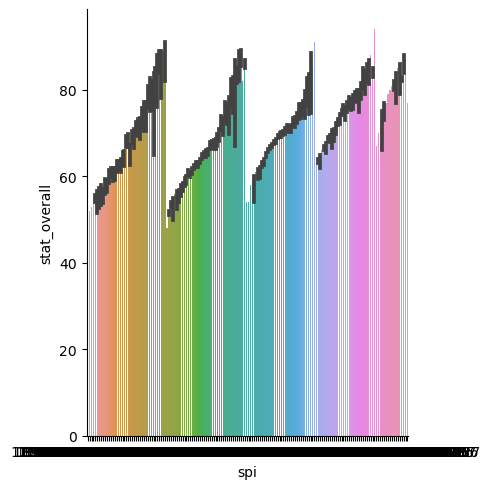

In [47]:
# Correlation between numerical and categorical variables
sns.catplot(x="spi", y="stat_overall", data=train, kind="bar")

# Show plot
plt.show()

29. 경험과 발전률 지수(Experience and Growth Index): 각 선수의 레퓌테이션(reputation)과 현재 능력치(stat_overall)와 잠재 능력치(potential)를 이용하여 경험과 발전률 지수를 계산합니다.<br> 이 값이 클수록 선수의 경험이 많고 능력치가 발전할 가능성이 높다고 가정할 수 있습니다. <br>경험과 발전률 지수는 레퓌테이션, 현재 능력치, 잠재 능력치의 가중 조화평균으로 계산됩니다.

파생변수 이름: egi (Experience and Growth Index)

수식: egi = (reputation^0.5 * (overall * potential)^0.5) / (reputation^0.5 + (overall * potential)^0.5)

In [48]:
train['egi'] = (train['reputation'] ** 0.5 * (train['stat_overall'] * train['stat_potential']) ** 0.5) / (train['reputation'] ** 0.5 + (train['stat_overall'] * train['stat_potential']) ** 0.5)

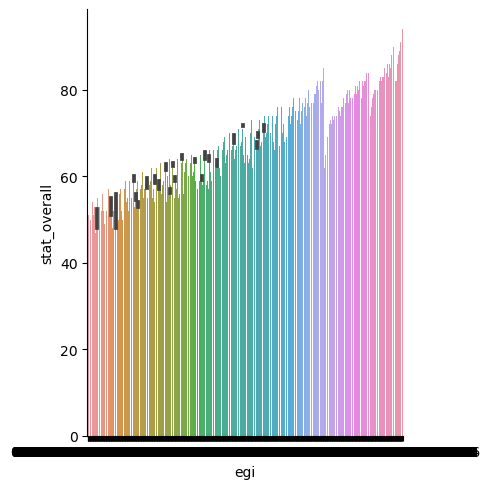

In [49]:
# Correlation between numerical and categorical variables
sns.catplot(x="egi", y="stat_overall", data=train, kind="bar")

# Show plot
plt.show()

30. 선수의 능력치가 높아질수록 선수의 잠재 능력치와의 관계가 지수적으로 증가할 수 있습니다.

아래는 age, stat_overall, stat_potential, reputation을 사용하여 exp_skill 파생변수를 만드는 코드 예시입니다.

In [51]:
import numpy as np

# exponential skill based on age, overall rating, potential and reputation
def exp_skill(train):
    age = train['age']
    overall = train['stat_overall']
    potential = train['stat_potential']
    reputation = train['reputation']
    
    # apply exponential function
    exp_skill = np.exp(0.01*age + 0.5*overall + 0.2*potential + 0.1*reputation)
    
    return exp_skill

In [20]:
train['contract_until_year']

0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until_year, Length: 8932, dtype: int64

### age 변수 전처리

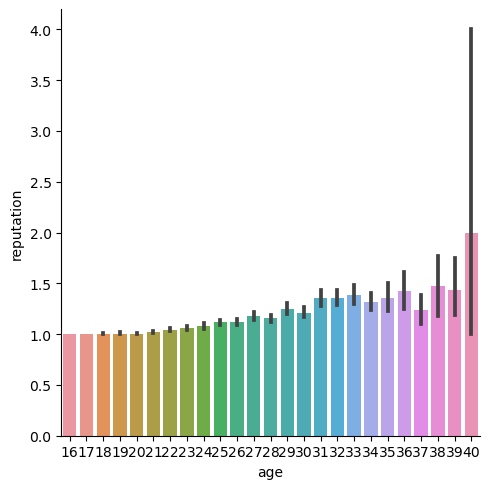

In [14]:
# Correlation between numerical and categorical variables
sns.catplot(x="age", y="reputation", data=train, kind="bar")

# Show plot
plt.show()

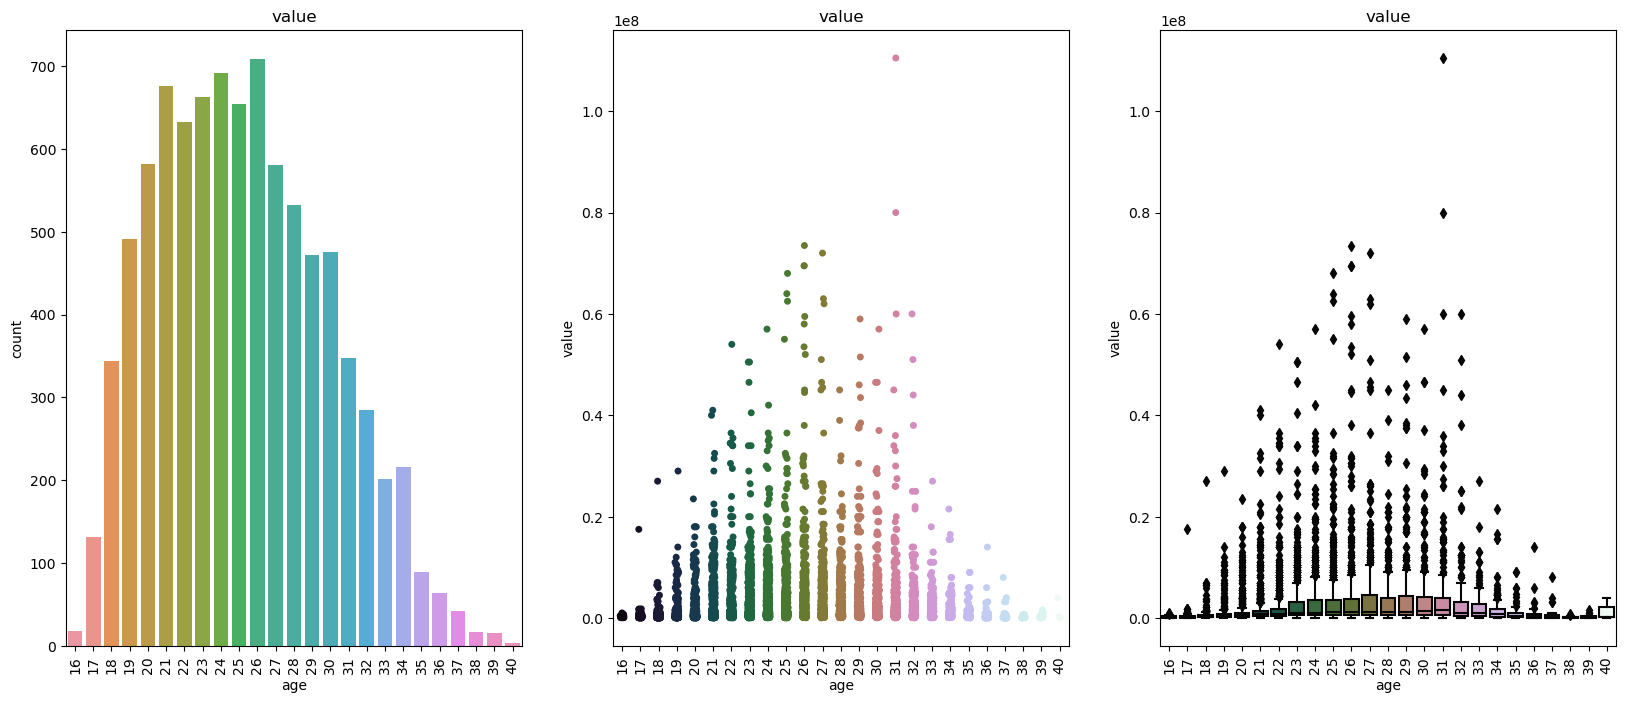

In [9]:
col=train['age']

plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.title("value")
sns.countplot(data=nums, x=col)
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.title("value")
sns.stripplot(data=nums, x=col, y='value', palette=("cubehelix"))
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.title("value")
sns.boxplot(data=nums, x=col, y='value', palette=("cubehelix"))
plt.xticks(rotation=90)    
    
plt.show()

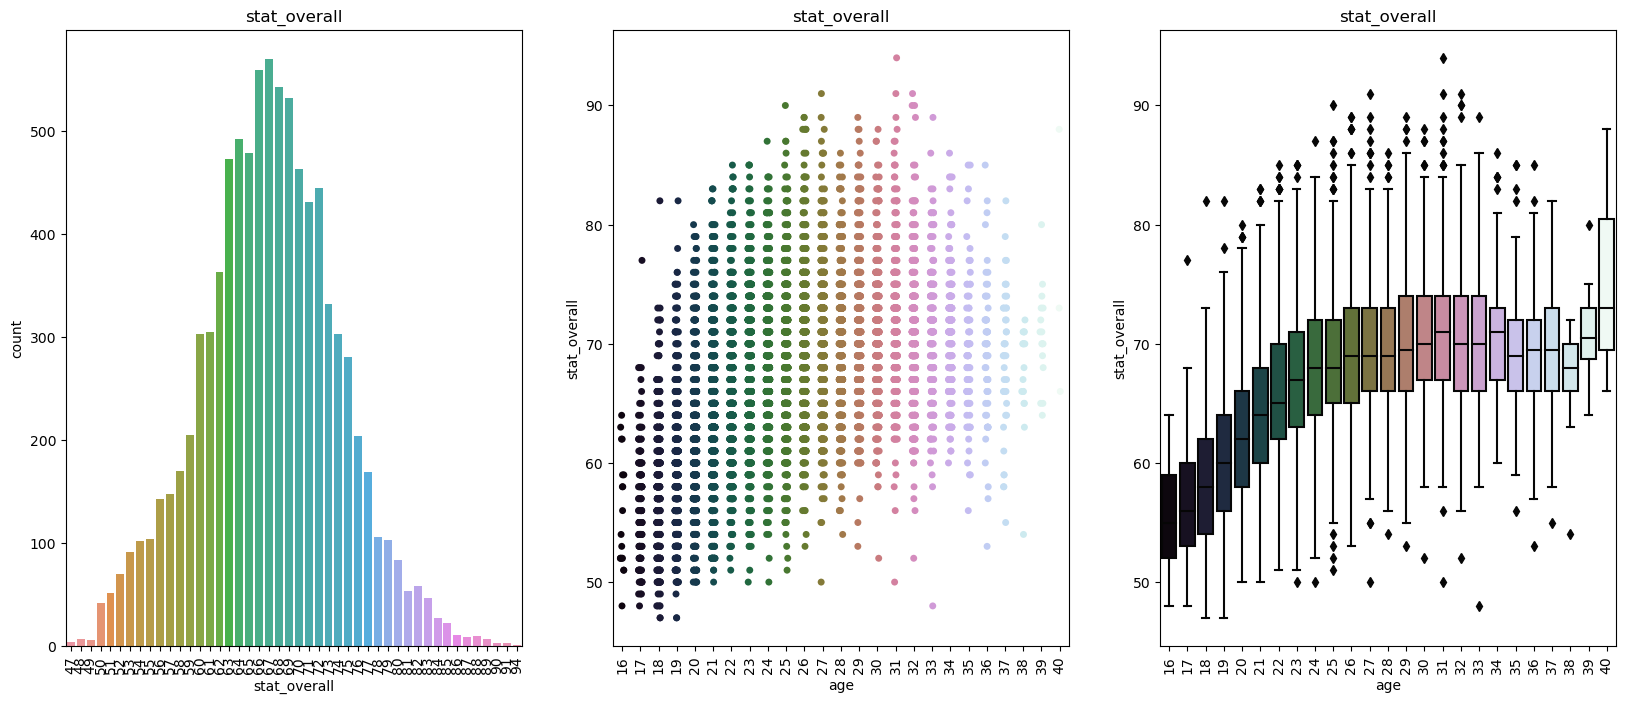

In [19]:
col=train['age']

plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.title("stat_overall")
sns.countplot(data=nums, x=train['stat_overall'])
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.title("stat_overall")
sns.stripplot(data=nums, x=col, y='stat_overall', palette=("cubehelix"))
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.title("stat_overall")
sns.boxplot(data=nums, x=col, y='stat_overall', palette=("cubehelix"))
plt.xticks(rotation=90)    
    
plt.show()

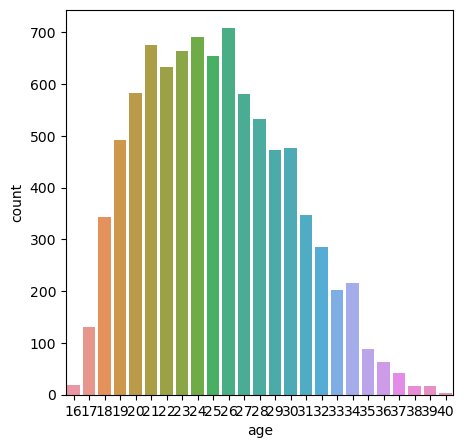

In [21]:
sns.countplot(x = 'age', data = nums)
plt.show()

In [6]:
train = train.drop(['id', 'name'], axis=1)
test = test.drop(['id', 'name'], axis=1)

In [9]:
class ArrayChanger:
    def __init__(self):
        pass

    def replace_value(self, year, arr):
        for i in range(len(arr)):
            if str(year) in arr[i]:
                arr[i] = str(year)
        return arr

    def replace_all(self, arr):
        print("Replaced array for 2018: ", self.replace_value(2018, arr))
        print("Replaced array for 2019: ", self.replace_value(2019, arr))
        print("Replaced array for 2020: ", self.replace_value(2020, arr))

ac = ArrayChanger()
ac.replace_all(train['contract_until'])
ac.replace_all(test['contract_until'])

/tmp/ipykernel_92458/2915400597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = str(year)


Replaced array for 2018:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2019:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2020:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2018:  0       2022
1       2022
2       2023
3       2020
4       2020
        ... 
3823    2021
3824    2018
3825    2021
3826    2020
3827    2021
Name: contract_until, Length: 3828, dtype: object
Replaced array for 2019:  0       2022
1       2022
2       2023
3       2020
4       2020
        ... 
3823    2021
3824   

In [10]:
# 데이터 분할 (X, y)
X = train.drop(['value'], axis=1)
y = train['value']
print(X.shape)
print(y.shape)

display(X.head())
display(y.head())

(8932, 9)
(8932,)


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,31,south america,2021,ST,left,5.0,94,94,4.0
1,27,europe,2020,GK,right,4.0,91,93,1.0
2,31,south america,2021,ST,right,5.0,91,91,3.0
3,32,europe,2020,DF,right,4.0,91,91,3.0
4,25,europe,2021,GK,right,3.0,90,93,1.0


0    110500000.0
1     72000000.0
2     80000000.0
3     51000000.0
4     68000000.0
Name: value, dtype: float64

In [11]:
# 데이터 분할 (학습데이터, 평가데이터)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.3, random_state = 1, shuffle=True, stratify = X["reputation"]
)
print(X.shape)
print(X_train.describe())
print(X_test.describe())

(8932, 9)
               age   reputation  stat_overall  stat_potential  \
count  6252.000000  6252.000000   6252.000000     6252.000000   
mean     25.211292     1.131158     67.129239       72.005598   
std       4.606546     0.424880      6.781169        5.977626   
min      16.000000     1.000000     47.000000       48.000000   
25%      22.000000     1.000000     63.000000       68.000000   
50%      25.000000     1.000000     67.000000       72.000000   
75%      28.000000     1.000000     72.000000       76.000000   
max      40.000000     5.000000     94.000000       94.000000   

       stat_skill_moves  
count       6252.000000  
mean           2.405310  
std            0.772771  
min            1.000000  
25%            2.000000  
50%            2.000000  
75%            3.000000  
max            5.000000  
               age   reputation  stat_overall  stat_potential  \
count  2680.000000  2680.000000   2680.000000     2680.000000   
mean     25.204104     1.130224     67.0

In [12]:
# X_train = train.drop(['value'], axis=1)
# y_train = train['value']
# print(X_train.shape)
# print(y_train.shape)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6252 entries, 8091 to 6972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               6252 non-null   int64  
 1   continent         6252 non-null   object 
 2   contract_until    6252 non-null   object 
 3   position          6252 non-null   object 
 4   prefer_foot       6252 non-null   object 
 5   reputation        6252 non-null   float64
 6   stat_overall      6252 non-null   int64  
 7   stat_potential    6252 non-null   int64  
 8   stat_skill_moves  6252 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 488.4+ KB


In [14]:
X_train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
8091,22,europe,2022,DF,right,1.0,58,69,2.0
6956,19,south america,2021,MF,left,1.0,62,77,2.0
6348,23,south america,2021,MF,right,1.0,63,67,2.0
6223,18,south america,2021,DF,left,1.0,64,77,3.0
2005,25,south america,2023,DF,right,1.0,72,77,2.0
...,...,...,...,...,...,...,...,...,...
6484,28,asia,2021,GK,right,1.0,63,63,1.0
2239,26,south america,2019,MF,right,1.0,72,73,3.0
1228,30,south america,2020,DF,right,1.0,74,74,3.0
6013,19,europe,2020,ST,right,1.0,64,80,3.0


In [15]:
X_train['contract_until'].value_counts()

2019    2059
2021    1624
2020    1394
2022     540
2023     348
2018     275
2024       9
2025       2
2026       1
Name: contract_until, dtype: int64

In [16]:
X_train['continent'].value_counts()

europe           3749
south america    1345
asia              533
africa            499
oceania           126
Name: continent, dtype: int64

In [17]:
X_train['position'].value_counts()

MF    2400
DF    1945
ST    1220
GK     687
Name: position, dtype: int64

In [18]:
X_train['prefer_foot'].value_counts()

right    4735
left     1517
Name: prefer_foot, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

# 수치형 / 범주형 변수 선언
num_var = X_train.select_dtypes(include=np.number).columns.tolist()
cat_var = X_train.select_dtypes(exclude=np.number).columns.tolist()

# 수치형 변수 전처리를 위한 파이프라인 설정
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# 범주형 변수 전처리를 위한 파이프라인 설정
cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder(sparse=False, drop='if_binary'))
    ])

# 수치형 / 범주형 변수에 대한 자동 전처리를 위한 파이프라인 설정

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_var),
        ("cat", cat_pipeline, cat_var)])

X_train_pretained = full_pipeline.fit_transform(X_train)

In [23]:
X_train_pretained.shape

(6252, 24)

In [24]:
df=pd.DataFrame(X_train_pretained)
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.697171,-0.308719,-1.346371,-0.502848,-0.524531,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.348470,-0.308719,-0.756455,0.835583,-0.524531,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.480071,-0.308719,-0.608976,-0.837456,-0.524531,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.565570,-0.308719,-0.461497,0.835583,0.769616,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.045872,-0.308719,0.718335,0.835583,-0.524531,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,0.605428,-0.308719,-0.608976,-1.506671,-1.818679,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6248,0.171228,-0.308719,0.718335,0.166367,0.769616,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6249,1.039627,-0.308719,1.013293,0.333671,0.769616,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6250,-1.348470,-0.308719,-0.461497,1.337494,0.769616,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [25]:
df[:1]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.697171,-0.308719,-1.346371,-0.502848,-0.524531,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
full_pipeline.fit(X_train)
full_pipeline.transform(X_test)

array([[-0.69717077, -0.30871884, -0.90393394, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.38832798,  2.04507404,  2.48808288, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38832798, -0.30871884, -0.60897595, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.48007102, -0.30871884, -0.75645494, ...,  0.        ,
         0.        ,  0.        ],
       [-0.91427052,  2.04507404,  1.01329296, ...,  1.        ,
         0.        ,  1.        ],
       [-0.48007102, -0.30871884, -0.46149696, ...,  0.        ,
         1.        ,  1.        ]])

In [22]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression(fit_intercept=True, n_jobs=None)
model_linear.fit(X_train_pretained, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# 평가 데이터에 대한 전처리
X_test_prepared = full_pipeline.transform(X_test)  

# 평가 데이터에 대한 예측
y_test_hat = model_linear.predict(X_test_prepared)

# 평가 데이터에 대한 평가
mse_linear = mean_squared_error(y_test, y_test_hat, squared=True) # mean squared error
rmse_linear = mean_squared_error(y_test, y_test_hat, squared=False) # root mean squared error
mae_linear = mean_absolute_error(y_test, y_test_hat) # mean absolute error
mape_linear = mean_absolute_percentage_error(y_test, y_test_hat) # mean absolute error

print(f'mse_linear:{mse_linear}')
print(f'rmse_linear:{rmse_linear}')
print(f'mae_linear:{mae_linear}')
print(f'mape_linear:{mape_linear}')

mse_linear:12548377653971.838
rmse_linear:3542368.932504326
mae_linear:1886244.3376681372
mape_linear:4.897755909300836
